In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf

In [49]:
sns.set_theme(style = 'white', context = 'paper', font_scale = 1.35)
plt.rcParams['font.family'] = 'Times New Roman'
sns.set_palette('muted')

def LinePlot(df, name):
    fig, ax = plt.subplots(figsize = (15,7))
    ax.plot(df)
    ax.axvspan('2020-02-01', '2020-04-01', color = 'lightgrey', alpha = 0.65)
    ax.axvspan('2007-12-01', '2009-06-01', color = 'lightgrey', alpha = 0.65)
    plt.title(f'Russell Indexes {name} over Time')
    plt.xlabel('Date')
    plt.ylabel(name)
    plt.legend(df.columns, loc = 'lower center', bbox_to_anchor = (0.5, -0.225), edgecolor = 'white', ncol = 3)
    plt.show()

In [50]:
tickers = {
    'Russell 1000 Growth':'^RLG',
    'Russell 1000 Value':'^RLV',
    'Russell 3000 Market':'^RUA'
    }

start = '2000-01-01'
end = '2024-11-30'

prices = yf.download(list(tickers.values()), start, end)['Adj Close']

prices.columns = list(tickers.keys())

prices.dropna(inplace = True)

prices.head()

[*********************100%***********************]  3 of 3 completed


,Russell 1000 Growth,Russell 1000 Value,Russell 3000 Market
Date,,,
2002-09-30 00:00:00+00:00,342.059998,420.440002,455.410004
2002-10-01 00:00:00+00:00,355.429993,435.899994,472.010010
2002-10-02 00:00:00+00:00,348.649994,423.269989,460.809998
2002-10-03 00:00:00+00:00,344.950012,417.959991,455.540009
2002-10-04 00:00:00+00:00,337.070007,408.109985,444.929993


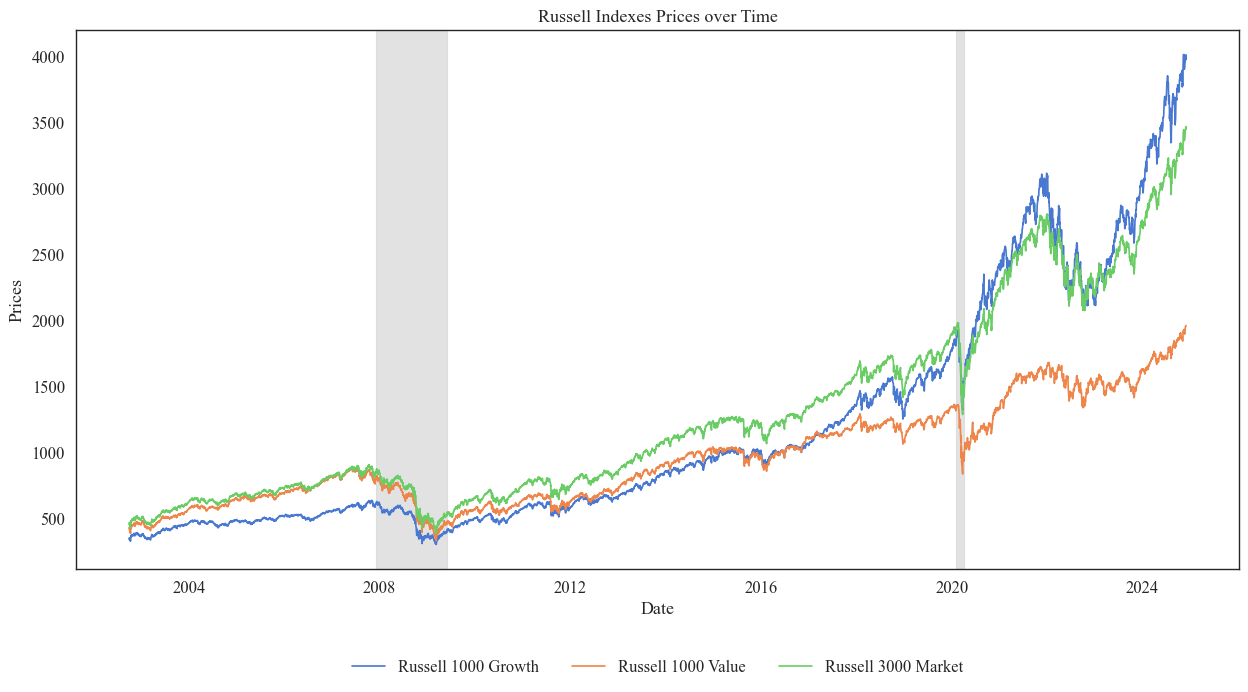

In [51]:
LinePlot(prices, 'Prices')

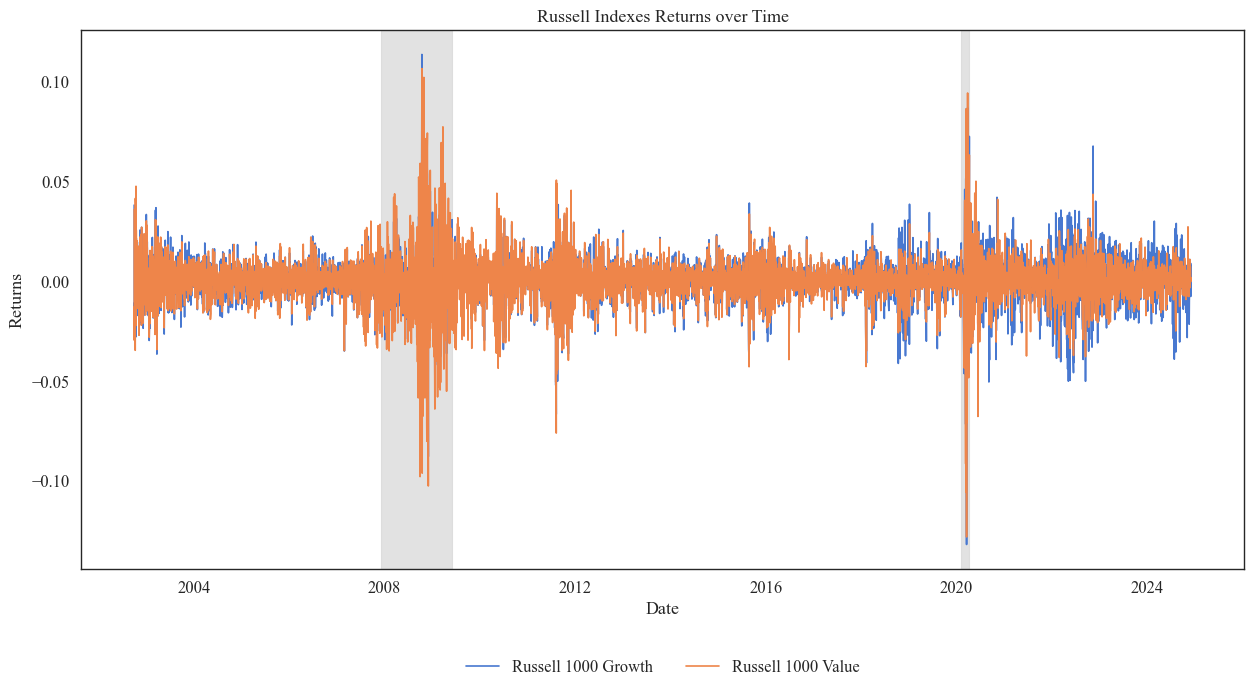

In [66]:
returns = np.log(prices / prices.shift(1))

LinePlot(returns.drop(columns = ['Russell 3000 Market']), 'Returns')

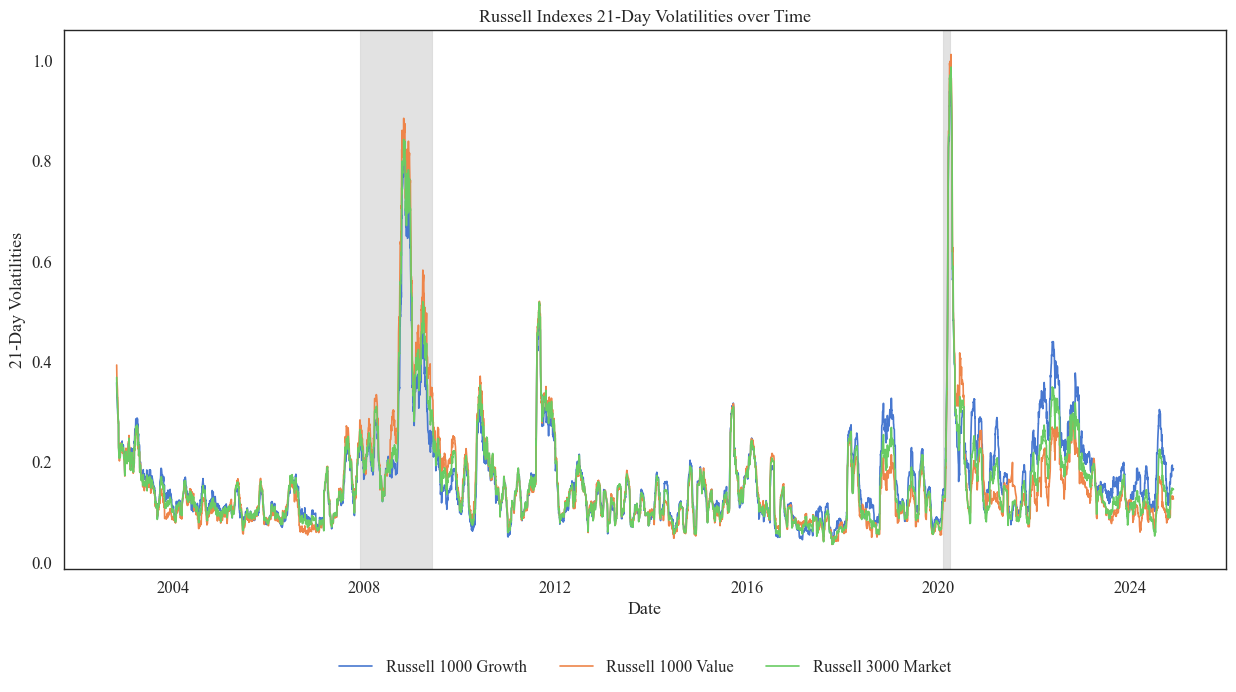

In [53]:
volatilities = returns.rolling(window = 21).std() * np.sqrt(252)

LinePlot(volatilities, '21-Day Volatilities')

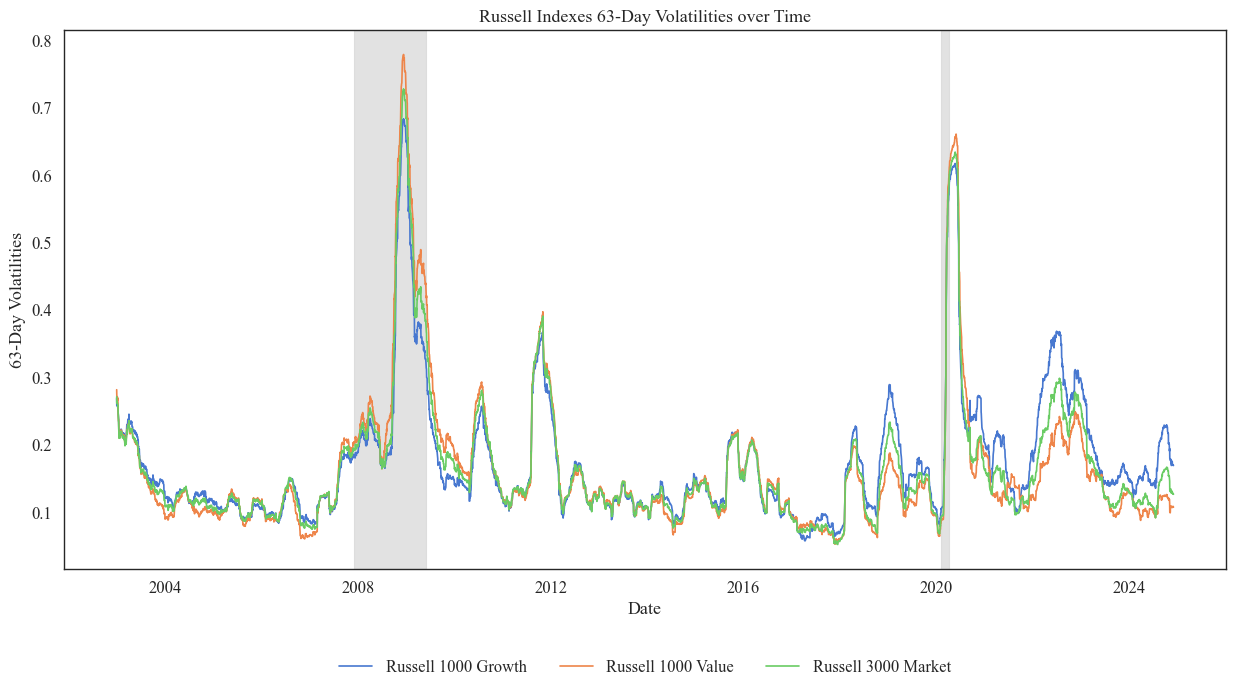

In [54]:
volatilities = returns.rolling(window = 63).std() * np.sqrt(252)

LinePlot(volatilities, '63-Day Volatilities')

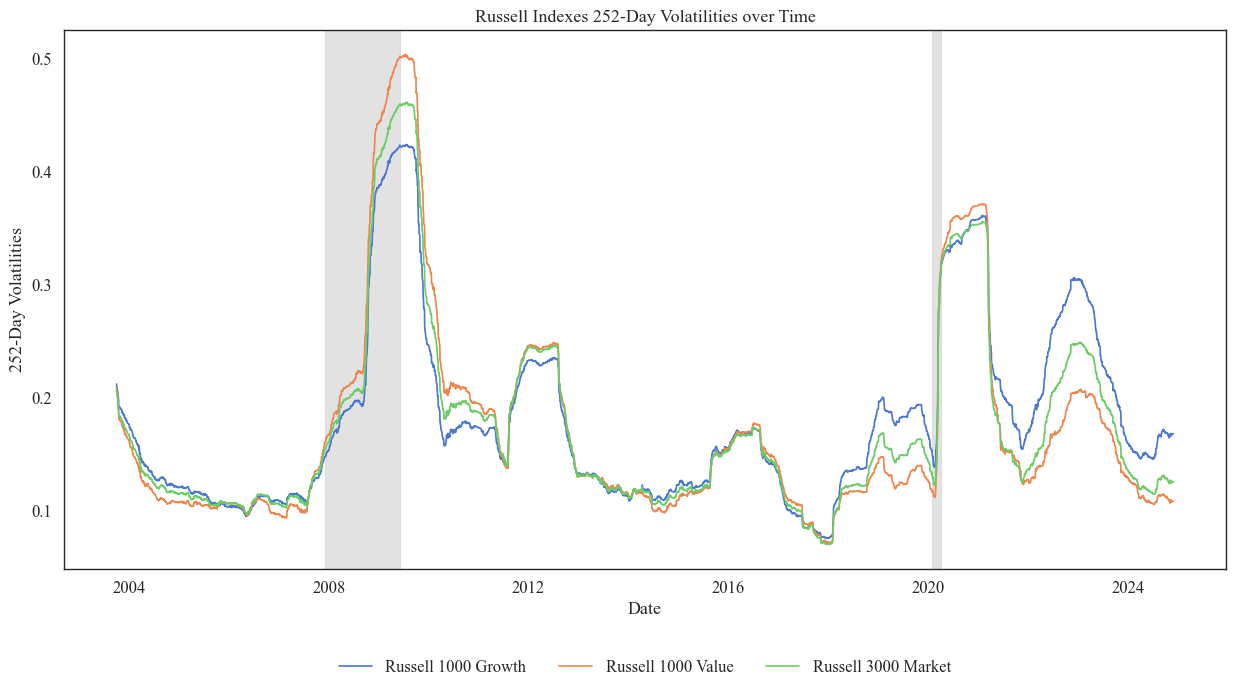

In [55]:
volatilities = returns.rolling(window = 252).std() * np.sqrt(252)

LinePlot(volatilities, '252-Day Volatilities')

<Figure size 1500x700 with 0 Axes>

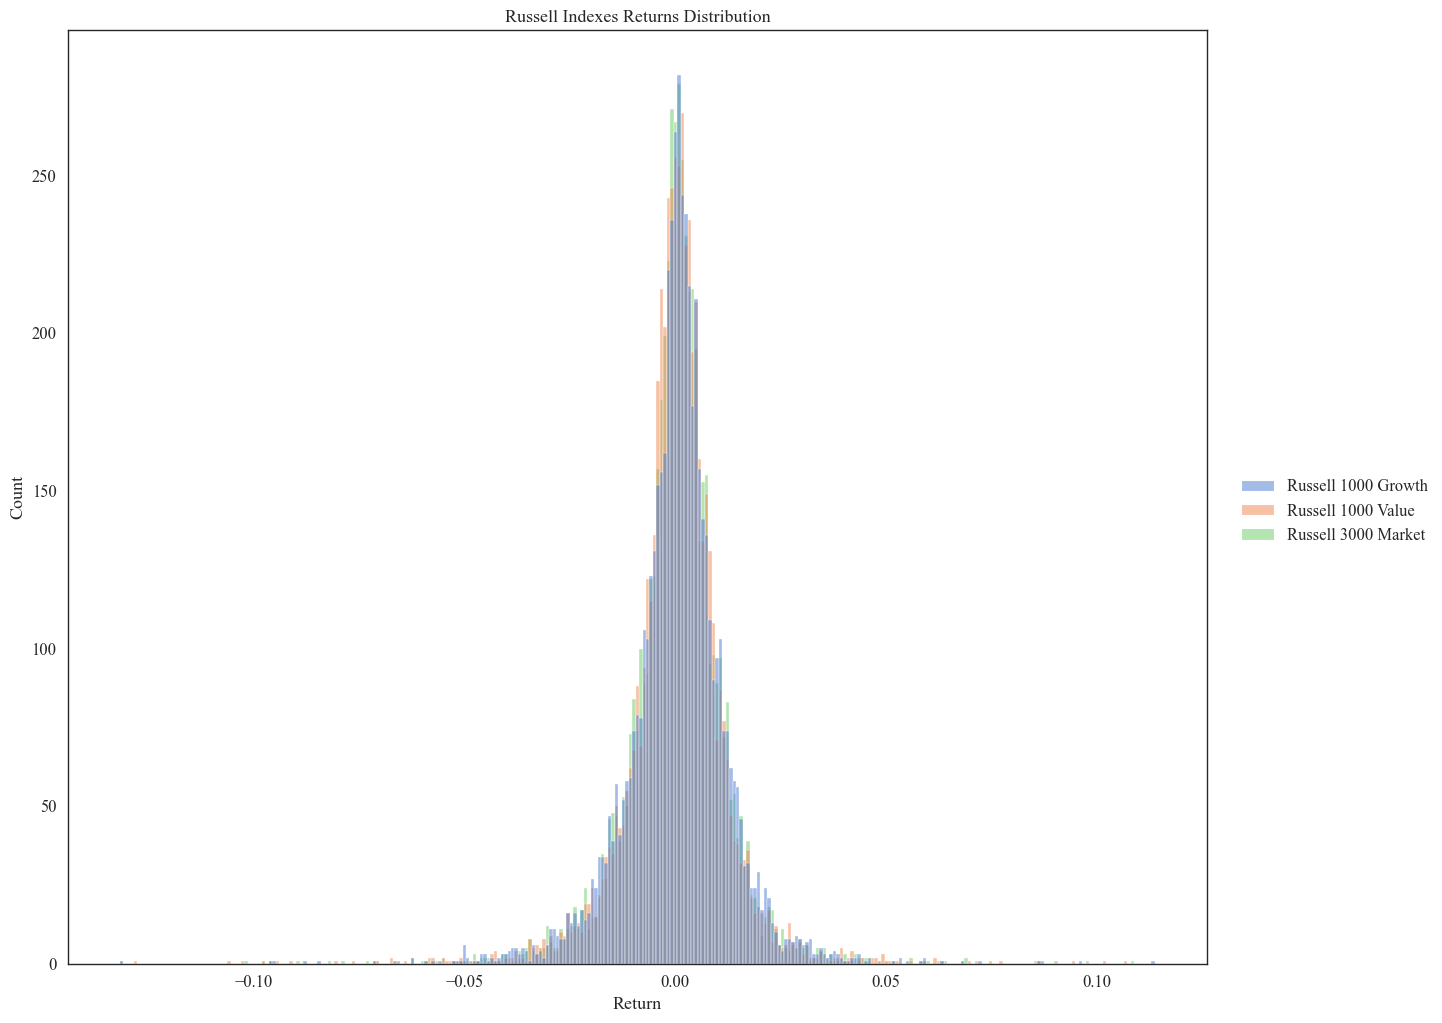

In [56]:
plt.figure(figsize = (15,7))
sns.displot(returns, height = 10, aspect = 1.25)
plt.title('Russell Indexes Returns Distribution')
plt.xlabel('Return')
plt.ylabel('Count')
sns.despine(top = False, right = False)
plt.show()

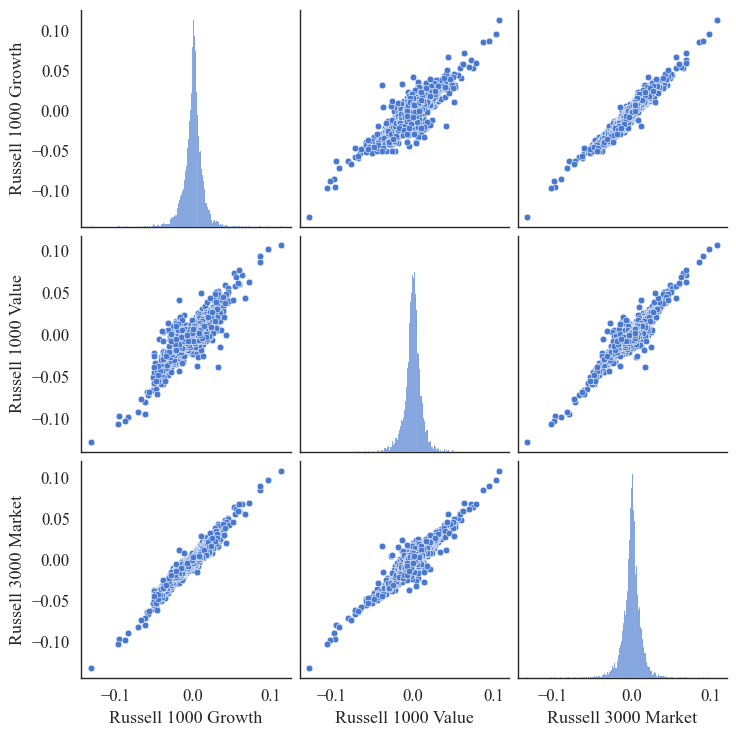

In [57]:
sns.pairplot(returns)

In [65]:
from scipy.stats import ks_2samp, mannwhitneyu, anderson_ksamp, chisquare

stat, p_value = ks_2samp(returns['Russell 1000 Growth'].dropna(), returns['Russell 1000 Value'].dropna())
print(f"KS Statistic: {stat}, P-value: {p_value}")   # Null hypothesis of Kolmogorov-Smirnov (KS) Test: two series are from same distribution

stat, p_value = mannwhitneyu(returns['Russell 1000 Growth'].dropna(), returns['Russell 1000 Value'].dropna())
print(f"U Statistic: {stat}, P-value: {p_value}")   # Null hypothesis of Mann-Whitney U Test: two series are from same distribution

result = anderson_ksamp([returns['Russell 1000 Growth'].dropna(), returns['Russell 1000 Value'].dropna()])
print(f"Statistic: {result.statistic}, P-value: {result.pvalue}")  # Null hypothesis of Anderson-Darling  Test: two series are from same distribution

KS Statistic: 0.02990990990990991, P-value: 0.013951178671106039
U Statistic: 15619585.0, P-value: 0.1958664723500373
Statistic: 3.9062325584098425, P-value: 0.008752120146959341


In [58]:
returns['G>V'] = returns['Russell 1000 Growth'] > returns['Russell 1000 Value']
returns['G>V'].value_counts()

G>V
True     2901
False    2650
Name: count, dtype: int64

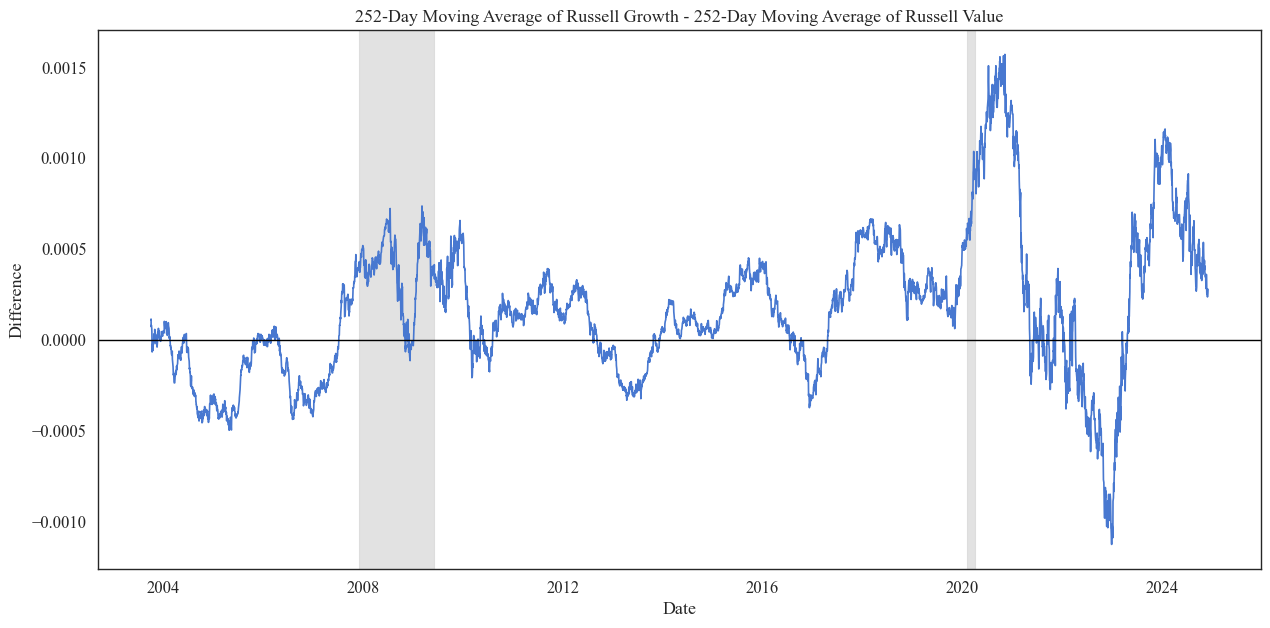

In [59]:
returns['G-V'] = returns['Russell 1000 Growth'].rolling(window = 252).mean() - returns['Russell 1000 Value'].rolling(window = 252).mean()

fig, ax = plt.subplots(figsize = (15,7))
ax.plot(returns['G-V'])
ax.axvspan('2020-02-01', '2020-04-01', color = 'lightgrey', alpha = 0.65)
ax.axvspan('2007-12-01', '2009-06-01', color = 'lightgrey', alpha = 0.65)
ax.axhline(0, color = 'black', linewidth = 1)
plt.title(f'252-Day Moving Average of Russell Growth - 252-Day Moving Average of Russell Value')
plt.xlabel('Date')
plt.ylabel('Difference')
plt.show()